In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Load the data
Followed by the data exploration

In [30]:
data = pd.read_csv('diabetes.csv')
print(data.shape)

(768, 9)


In [31]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Notes on the data
- There are some features with zero values that are not possible (e.g. BMI, blood pressure, etc.)
- 35% out of the 768 patients have diabetes
- The data is not normalized

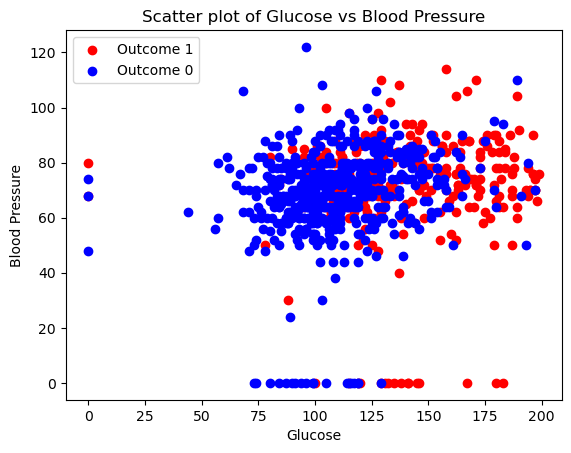

In [34]:
plt.figure()

plt.scatter(data[data['Outcome'] == 1]['Glucose'], data[data['Outcome'] == 1]['BloodPressure'],
            color='red', label='Outcome 1')

plt.scatter(data[data['Outcome'] == 0]['Glucose'], data[data['Outcome'] == 0]['BloodPressure'],
            color='blue', label='Outcome 0')

plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('Scatter plot of Glucose vs Blood Pressure')
plt.legend()

plt.show()


# Creating a first simple Model
Here we will create a simple model using a Decision Tree Classifier
With no preprocessing of the data, no feature selection, etc.
Also not setting a max_depth for the tree, so it will overfit the data

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.701


# Limiting the Depth of the Model
experimentation with different depths

In [39]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.777
Accuracy on test set: 0.747


In [51]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.777
Accuracy on test set: 0.747


In [52]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.809
Accuracy on test set: 0.734


The Accuracy on the test set is the same at 2 and 3, starts to decrease at 4.


In [53]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
                feature_names=data.columns[:-1], impurity=False, filled=True)

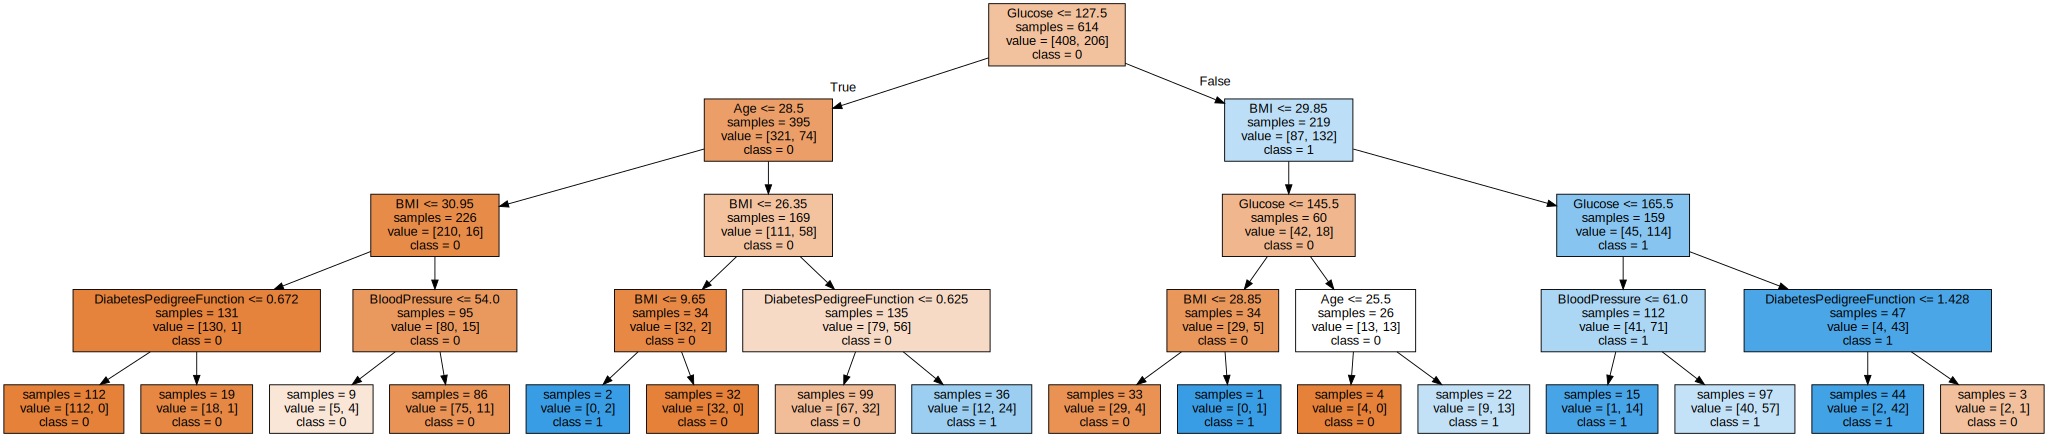

In [54]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

![Decision Tree](tree.png)